In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.genfromtxt('perceptron_data.txt', delimiter = '\t')
X, y = data[:,:2],data[:,2]
y = y.astype(int)

In [3]:
print("Class Count:", np.bincount(y))
print("Features:", X.shape)
print("Output class:", y.shape)

Class Count: [50 50]
Features: (100, 2)
Output class: (100,)


In [4]:
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X,y = X[shuffle_idx], y[shuffle_idx]

In [5]:
X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

In [6]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [7]:
X_train

array([[ 1.37001499,  0.89400639],
       [-1.47257051, -0.30436276],
       [ 1.78644472,  1.28241061],
       [ 0.75442323,  0.49612888],
       [-0.70760722, -1.02433157],
       [ 0.21125402, -1.03854148],
       [ 0.3832576 , -0.63592734],
       [-1.29604052, -2.21322744],
       [ 0.6503158 ,  1.17346797],
       [ 0.740844  ,  1.72765449],
       [-1.13761617, -1.14274749],
       [-2.35069406, -0.46540841],
       [ 1.07579834,  1.48134937],
       [-0.63518466, -0.65013725],
       [-1.25077642, -2.04744514],
       [-0.48128671, -1.35589615],
       [ 0.44210094,  0.87505984],
       [ 0.62768375,  0.7803271 ],
       [-1.16024822, -1.13801085],
       [-0.73023927,  0.28298022],
       [ 0.47378581,  1.17346797],
       [ 0.9219004 ,  0.29719013],
       [ 0.90832117,  1.66134157],
       [-0.44054902, -1.91955595],
       [ 0.78158169,  0.2024574 ],
       [-0.62160543, -1.16643068],
       [ 0.71368554,  1.76554758],
       [-0.79813542, -0.6311907 ],
       [-0.98824464,

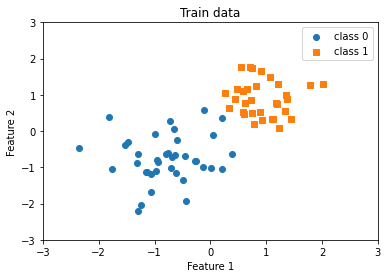

In [8]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], label = "class 0", marker = 'o')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], label = "class 1", marker = 's')

plt.title("Train data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.show()

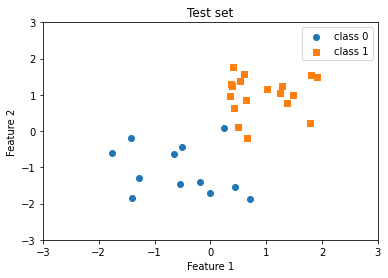

In [9]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], label = 'class 0', marker = 'o')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], label = "class 1", marker = 's')

plt.title("Test set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.show()

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Perceptron():
    def __init__(self, features):
        self.features = features
        self.weights = torch.zeros(features, 1, dtype = torch.float32, device = device)
        self.bias = torch.zeros(1, dtype = torch.float32, device = device)
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)
    
    def forward(self,x):
        net_input = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(net_input > 0., self.ones, self.zeros)
        return predictions
    
    
    def backward(self, x, y):
        predictions = self.forward(x)
        error = y - predictions
        return error
    
    def train(self, x, y, epochs):
        for j in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.features,1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

In [37]:
X_train_tensor = torch.tensor(X_train, dtype = torch.float32, device = device) 
X_test_tensor = torch.tensor(X_test, dtype = torch.float32, device = device)

y_train_tensor = torch.tensor(y_train, dtype = torch.float32, device = device)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32, device = device)

In [38]:
percep = Perceptron(features = 2)
percep.train(X_train_tensor, y_train_tensor, epochs = 5)

print("Model Parameters:")
print("Weights:", percep.weights)
print("Bias", percep.bias)

Model Parameters:
Weights: tensor([[1.2734],
        [1.3464]])
Bias tensor([-1.])


In [48]:
accuracy = percep.evaluate(X_train_tensor, y_train_tensor)
print('Train set accuracy: %.2f%%' % (accuracy*100))

Train set accuracy: 100.00%


In [49]:
accuracy = percep.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (accuracy*100))

Test set accuracy: 93.33%


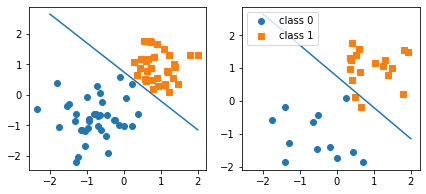

In [55]:
w, b = percep.weights, percep.bias

x0_min = -2
x1_min = ((-(w[0]*x0_min) - b[0])/w[1])

x0_max = 2
x1_max = ((-(w[0]*x0_max) - b[0])/w[1])

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].plot([x0_min, x0_max], [x1_min, x1_max])

ax[0].scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], label='class 0', marker ='o')
ax[0].scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], label='class 1', marker ='s')

ax[1].scatter(X_test[y_test == 0,0], X_test[y_test == 0,1], label='class 0', marker ='o')
ax[1].scatter(X_test[y_test == 1,0], X_test[y_test == 1,1], label='class 1', marker ='s')

ax[1].legend(loc='upper left')
plt.show()